In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import urllib
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"

In [64]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
df=pd.read_csv(url, parse_dates=['Date_reported'], date_parser=dateparse)

In [65]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [66]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,70858.000000,7.085800e+04,70858.000000,70858.000000
mean,629.326103,5.029955e+04,16.590265,1816.747876
std,4172.880411,3.662048e+05,108.205080,11071.457731
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,1.000000,2.630000e+02,0.000000,5.000000
75%,77.000000,6.260750e+03,1.000000,116.000000
max,97894.000000,8.763682e+06,6409.000000,226132.000000


In [67]:
#Negative new cases likely means reclassification of cases incorrectly classified as covid previously.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70858 entries, 0 to 70857
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_reported       70858 non-null  datetime64[ns]
 1    Country_code       70557 non-null  object        
 2    Country            70858 non-null  object        
 3    WHO_region         70858 non-null  object        
 4    New_cases          70858 non-null  int64         
 5    Cumulative_cases   70858 non-null  int64         
 6    New_deaths         70858 non-null  int64         
 7    Cumulative_deaths  70858 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.3+ MB


In [68]:
#remove spaces before the column headers
df.columns=[col.strip() for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70858 entries, 0 to 70857
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      70858 non-null  datetime64[ns]
 1   Country_code       70557 non-null  object        
 2   Country            70858 non-null  object        
 3   WHO_region         70858 non-null  object        
 4   New_cases          70858 non-null  int64         
 5   Cumulative_cases   70858 non-null  int64         
 6   New_deaths         70858 non-null  int64         
 7   Cumulative_deaths  70858 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.3+ MB


In [69]:
#Evaluate the highest new deaths for the UK
df.loc[(df.New_deaths>1000)&(df.Country=='The United Kingdom'),['Country','Date_reported','New_cases','New_deaths']]

,Country,Date_reported,New_cases,New_deaths
63112,The United Kingdom,2020-04-08,5282,1105
63113,The United Kingdom,2020-04-09,5450,1030
63114,The United Kingdom,2020-04-10,5131,1116
63115,The United Kingdom,2020-04-11,4858,1122
63119,The United Kingdom,2020-04-15,4178,1076
63121,The United Kingdom,2020-04-17,5065,1036
63123,The United Kingdom,2020-04-19,4956,1105
63126,The United Kingdom,2020-04-22,4854,1224
63129,The United Kingdom,2020-04-25,5158,1010


In [70]:
#Evaluate the highest new cases for the UK, to see the correlation with new deaths
df.loc[(df.New_cases >15000)&(df.Country=='The United Kingdom'),['Country','Date_reported','New_cases','New_deaths']]

,Country,Date_reported,New_cases,New_deaths
63292,The United Kingdom,2020-10-05,22961,33
63296,The United Kingdom,2020-10-09,17540,77
63298,The United Kingdom,2020-10-11,15165,81
63301,The United Kingdom,2020-10-14,17232,143
63302,The United Kingdom,2020-10-15,19724,137
63303,The United Kingdom,2020-10-16,18978,138
63304,The United Kingdom,2020-10-17,15635,136
63305,The United Kingdom,2020-10-18,16171,150
63306,The United Kingdom,2020-10-19,16981,67
63307,The United Kingdom,2020-10-20,18803,80


In [71]:
#The number of covid related deaths was higher in April 2020 but the number of new cases has been alot more recent
#Lets analyse the data less than 0 to see what cases have been incorrectly classified in the UK
df.loc[(df.New_deaths <0)&(df.Country=='The United Kingdom'),['Country','Date_reported','New_cases','New_deaths']]
df.loc[(df.New_cases <0)&(df.Country=='The United Kingdom'),['Country','Date_reported','New_cases','New_deaths']]

,Country,Date_reported,New_cases,New_deaths


In [72]:
#when was the worst death count due to covid?
df.loc[df.New_deaths.idxmax(),['Country','Date_reported','New_cases','Cumulative_cases','New_deaths']]

Country             United States of America
Date_reported            2020-04-17 00:00:00
New_cases                              28711
Cumulative_cases                      632781
New_deaths                              6409
Name: 67644, dtype: object

In [73]:
#Analysing the correlation between the four numerical columns of new cases/cumulative cases/new deaths and cumulative deaths
df.corr()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.845227,0.725607,0.773215
Cumulative_cases,0.845227,1.000000,0.586633,0.910227
New_deaths,0.725607,0.586633,1.000000,0.640283
Cumulative_deaths,0.773215,0.910227,0.640283,1.000000


In [74]:
##when was the highest death count in the UK due to covid?
dfuk=df[df.Country=='The United Kingdom']
dfuk.loc[dfuk.New_deaths.idxmax(),['Country','Date_reported','New_cases','Cumulative_cases','New_deaths']]

Country              The United Kingdom
Date_reported       2020-04-22 00:00:00
New_cases                          4854
Cumulative_cases                 130119
New_deaths                         1224
Name: 63126, dtype: object

In [84]:
dfuk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 63016 to 63316
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      301 non-null    datetime64[ns]
 1   Country_code       301 non-null    object        
 2   Country            301 non-null    object        
 3   WHO_region         301 non-null    object        
 4   New_cases          301 non-null    int64         
 5   Cumulative_cases   301 non-null    int64         
 6   New_deaths         301 non-null    int64         
 7   Cumulative_deaths  301 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 31.2+ KB


<AxesSubplot:xlabel='Date_reported', ylabel='New_cases'>

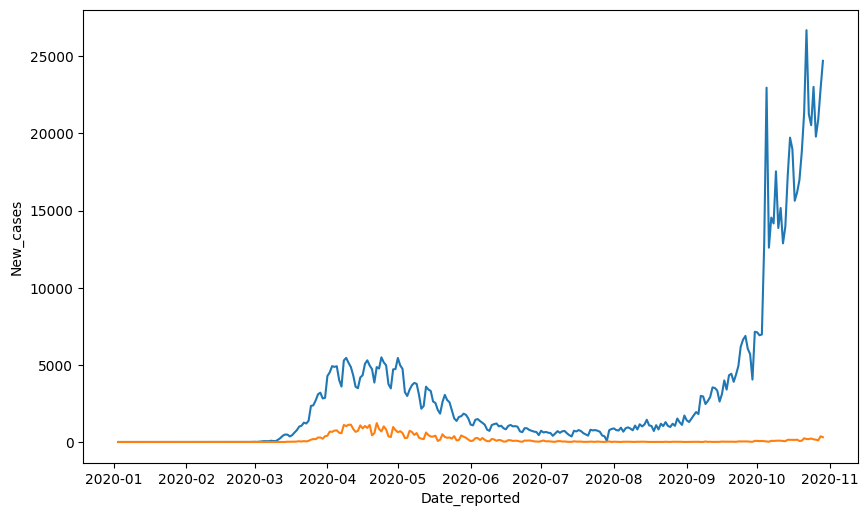

In [118]:
dfukg=dfuk[['Date_reported', 'New_cases','New_deaths']]
dfukg.groupby(dfukg['Date_reported'].dt.month)
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
sns.lineplot(data=dfukg, x='Date_reported', y='New_cases')
sns.lineplot(data=dfukg, x='Date_reported', y='New_deaths')

array([[<AxesSubplot:xlabel='New_cases', ylabel='New_cases'>,
        <AxesSubplot:xlabel='New_deaths', ylabel='New_cases'>],
       [<AxesSubplot:xlabel='New_cases', ylabel='New_deaths'>,
        <AxesSubplot:xlabel='New_deaths', ylabel='New_deaths'>]],
      dtype=object)

<Figure size 1200x800 with 0 Axes>

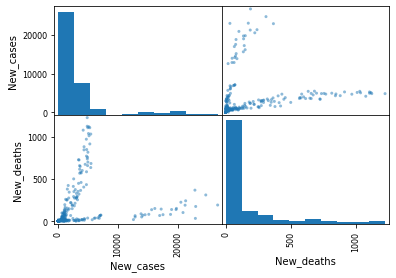

In [114]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
pd.plotting.scatter_matrix(dfukg)

In [119]:
dfukg.corr()

,New_cases,New_deaths
New_cases,1.000000,0.216299
New_deaths,0.216299,1.000000
